Result of training models with default params:

Mean Squared Error for Linear Regression: 2701310344.26589   
Mean Squared Error for Random Forest: 2567706556.0207033    
Mean Squared Error for SVM: 3943997884.475298    
Mean Squared Error for XGBoost: 2518672350.812344    
Mean Squared Error for LightGBM: 2657028304.8997755   

Trained models from best to worst:

XGBoost - MSE: 2518672350.812344 
Random Forest - MSE: 2567706556.0207033  
LightGBM - MSE: 2657028304.8997755
Linear Regression - MSE: 2701310344.26589
SVM - MSE: 3943997884.475298

We see that XGBoost is performing better than other models (Suprise!) so we tune the hyperparameters for better accuracy. 

xgboost hyperparametr tunning results:

1. with  param_grid = {
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 7],
        'n_estimators': [100, 200, 300],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [0, 0.1, 0.5]
    }
Mean Squared Error: 2494005870.010279
Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 0}

2. with param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [4, 5, 6],
    'n_estimators': [80, 100, 120],
    'reg_alpha': [0, 0.05, 0.1],
    'reg_lambda': [0, 0.05, 0.1]
}
Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.05, 'reg_lambda': 0}

Mean Squared Error: 2494005874.029345

3. with param_grid = {
    'learning_rate': [0.08, 0.1, 0.12],
    'max_depth': [4, 5, 6],
    'n_estimators': [90, 100, 110],
    'reg_alpha': [0.03, 0.05, 0.07, 0],
    'reg_lambda': [0.03, 0.05, 0.07]
}

4. with param_grid = {
    'learning_rate': [0.08, 0.1, 0.12],
    'max_depth': [4, 5, 6],
    'n_estimators': [90, 100, 110],
    'reg_alpha': [0.03, 0.05, 0.07, 0],
    'reg_lambda': [0.03, 0.05, 0.07]
} 

Best Hyperparameters:
{'learning_rate': 0.12, 'max_depth': 5, 'n_estimators': 90, 'reg_alpha': 0.07, 'reg_lambda': 0.07}

Mean Squared Error: 2492416319.543149

5. with param_grid = {
    'learning_rate': [0.08, 0.1, 0.12],
    'max_depth': [4, 5, 6],
    'n_estimators': [85, 90, 95, 100, 105],
    'reg_alpha': [0.03, 0.05, 0.07, 0.08, 0.09],
    'reg_lambda': [0.03, 0.05, 0.07, 0.08, 0.09]
}

6. with Best Hyperparameters:
{'learning_rate': 0.12, 'max_depth': 5, 'n_estimators': 90, 'reg_alpha': 0.09, 'reg_lambda': 0.07}

Mean Squared Error: 2492416346.4434867

trained xgboost:
Best Hyperparameters:
{'learning_rate': 0.12, 'max_depth': 5, 'n_estimators': 90, 'reg_alpha': 0.07, 'reg_lambda': 0.07}

Mean Squared Error with Best Parameters: 2492416319.543149

The trained model achieved a Root Mean Squared Error (RMSE) of 49924.16. The RMSE is a measure of the average prediction error in the same units as the target variable (salary). A lower RMSE indicates that the model's predictions are, on average, closer to the actual salary values. In this case, the RMSE of 49924.16 suggests that the model's predictions have an average deviation of approximately $49,924.16 from the actual salary values. It is important to note that the RMSE should be considered in the context of the salary range and the specific requirements of the problem domain. Overall, the model shows promising performance in predicting salaries based on the provided features.

Feature Importance:
job_title: 0.006018252111971378
employee_residence: 0.005628964863717556
company_location: 0.0031378392595797777
experience_level: 0.002692663809284568
work_year: 0.0015796443913131952
employment_type: 0.0012553913984447718
remote_ratio: 7.405032374663278e-05
company_size: 0.0


<Figure size 1000x600 with 0 Axes>

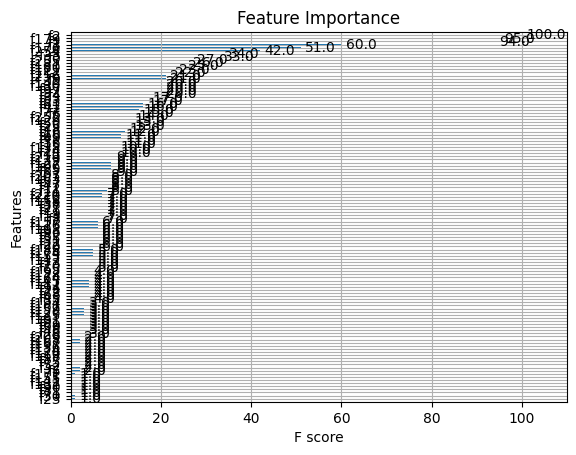

In [2]:
from xgboost import plot_importance
from joblib import load
import matplotlib.pyplot as plt

def get_feature_importance(model_path, numerical_features, categorical_features):
    # Load the trained XGBoost model
    xgb = load(model_path)

    # Get feature importance scores
    feature_importance = xgb.feature_importances_

    # Get the names of the features
    features = numerical_features + categorical_features

    # Create a dictionary to map feature names to importance scores
    importance_scores = dict(zip(features, feature_importance))

    # Sort the features by importance score in descending order
    sorted_features = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)

    # Print the feature importance scores
    print("Feature Importance:")
    for feature, importance in sorted_features:
        print(f"{feature}: {importance}")

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plot_importance(xgb)
    plt.title("Feature Importance")
    plt.xticks(rotation=0)
    plt.show()

# Usage example
model_path = 'xgboost_model.joblib'
numerical_features = ['experience_level']
categorical_features = ['work_year', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
get_feature_importance(model_path, numerical_features, categorical_features)
